In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [19]:
# 📌 Step 2. Load dataset
df = pd.read_csv("new_final_species.csv")   # or new_final_species_cleaned.csv
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Dataset Shape: (19686, 33)

Columns:
 ['aphia_id', 'ncbi_taxon_id', 'species_canonical', 'all_synonyms', 'publication_id', 'family_x', 'subspecies', 'authority', 'modified', 'status', 'rank', 'order', 'target_list_status', 'sequencing_status', 'isMarine', 'isBrackish', 'isFreshwater', 'isTerrestrial', 'isExtinct', 'spec_code', 'Genus', 'FBname', 'DemersPelag', 'Subfamily', 'depth_min_in_m', 'depth_max_in_m', 'common_depth_min', 'common_depth_max', 'length_max_in_cm', 'common_length_in_cm', 'weight_max_in_g', 'TempMin', 'TempMax']


In [20]:
# 📌 Step 3. Data types and missing values
print("\n--- Data Types ---\n")
print(df.dtypes)


--- Data Types ---

aphia_id               float64
ncbi_taxon_id          float64
species_canonical       object
all_synonyms            object
publication_id          object
family_x                object
subspecies              object
authority               object
modified                object
status                  object
rank                    object
order                   object
target_list_status      object
sequencing_status       object
isMarine               float64
isBrackish             float64
isFreshwater           float64
isTerrestrial          float64
isExtinct              float64
spec_code              float64
Genus                   object
FBname                  object
DemersPelag             object
Subfamily               object
depth_min_in_m         float64
depth_max_in_m         float64
common_depth_min       float64
common_depth_max       float64
length_max_in_cm       float64
common_length_in_cm    float64
weight_max_in_g        float64
TempMin           

In [21]:
print("\n--- Missing Values ---\n")
print(df.isnull().sum().sort_values(ascending=False))


--- Missing Values ---

isExtinct              19621
TempMax                19093
TempMin                19093
weight_max_in_g        18111
common_depth_min       17887
common_depth_max       17837
common_length_in_cm    17153
Subfamily              10791
ncbi_taxon_id           7868
FBname                  6977
depth_min_in_m          6939
depth_max_in_m          5529
length_max_in_cm        3699
DemersPelag             1570
spec_code               1570
Genus                   1570
isBrackish               819
isFreshwater             792
isTerrestrial            161
order                     46
authority                 46
isMarine                  44
aphia_id                  43
status                    43
modified                  43
rank                      43
sequencing_status          0
subspecies                 0
target_list_status         0
publication_id             0
all_synonyms               0
family_x                   0
species_canonical          0
dtype: int64


In [22]:
# 📌 Step 4. Summary statistics
print("\n--- Numeric Summary ---\n")
print(df.describe().T)


--- Numeric Summary ---

                       count          mean            std         min  \
aphia_id             19643.0  4.014779e+05  357833.099302  101170.000   
ncbi_taxon_id        11818.0  1.039561e+06  900096.307223    7748.000   
isMarine             19642.0  9.997454e-01       0.015953       0.000   
isBrackish           18867.0  1.318705e-01       0.338359       0.000   
isFreshwater         18894.0  5.250344e-02       0.223046       0.000   
isTerrestrial        19525.0  3.011524e-02       0.170909       0.000   
isExtinct               65.0  0.000000e+00       0.000000       0.000   
spec_code            18116.0  3.130889e+04   25627.081821       4.000   
depth_min_in_m       12747.0  1.414899e+02     397.247375       0.000   
depth_max_in_m       14157.0  4.801570e+02     841.468416       1.000   
common_depth_min      1799.0  1.346215e+02     337.527628       0.000   
common_depth_max      1849.0  2.656452e+02     502.811228       0.000   
length_max_in_cm     1598

In [23]:
print("\n--- Categorical Summary ---\n")
print(df.describe(include=["object"]).T)


--- Categorical Summary ---

                    count unique                  top   freq
species_canonical   19686  19685  Paraplagusia fieldi      2
all_synonyms        19686   7947                    -  11740
publication_id      19686      1                    -  19686
family_x            19686    494             Gobiidae   1525
subspecies          19686      1                    -  19686
authority           19640   7852     (Linnaeus, 1758)    272
modified            19643    497  2008-01-15 17:27:08  13553
status              19643      7             accepted  19288
rank                19643      2              Species  19642
order               19640     89          Perciformes   3072
target_list_status  19686      3            long_list  19680
sequencing_status   19686      5                    -  19521
Genus               18116   3189          Paraliparis    147
FBname              12709  12704        Black brotula      2
DemersPelag         18116      8             demersal  

In [24]:
# 📌 Step 5. Distribution of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

<Figure size 1500x800 with 0 Axes>

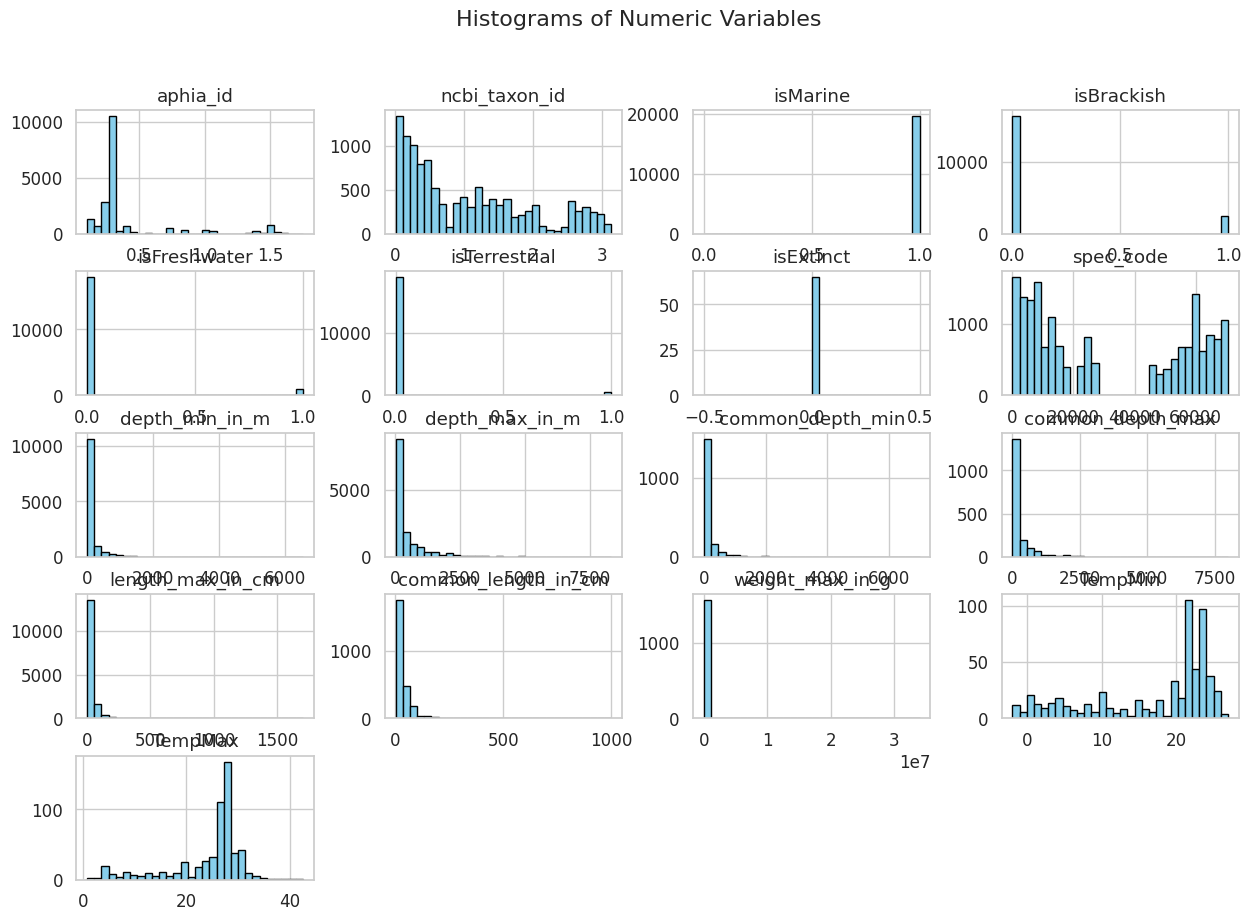

In [25]:
plt.figure(figsize=(15, 8))
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

In [26]:
# 📌 Step 6. Distribution of categorical variables
categorical_cols = df.select_dtypes(include="object").columns.tolist()

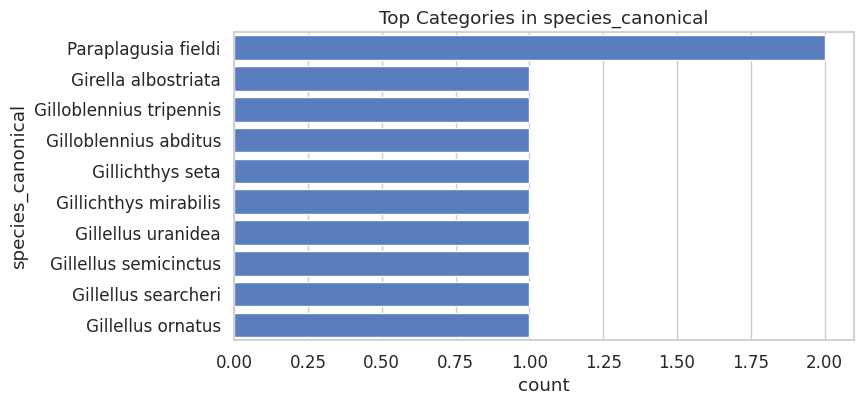

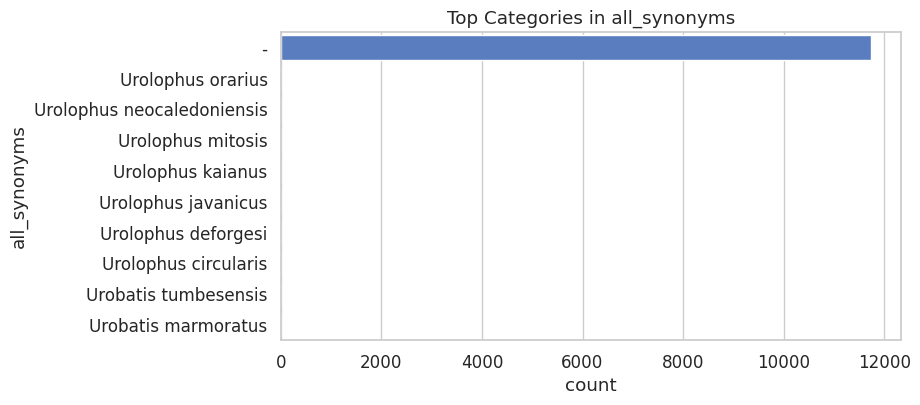

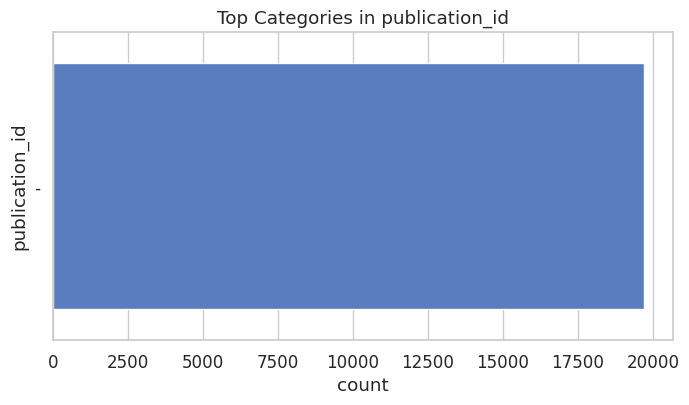

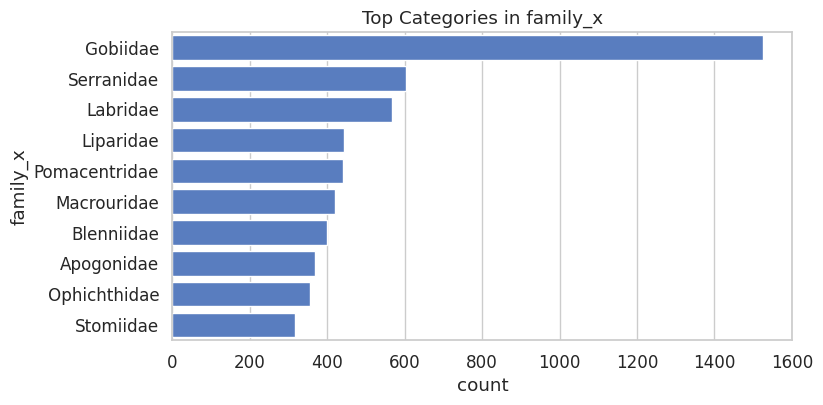

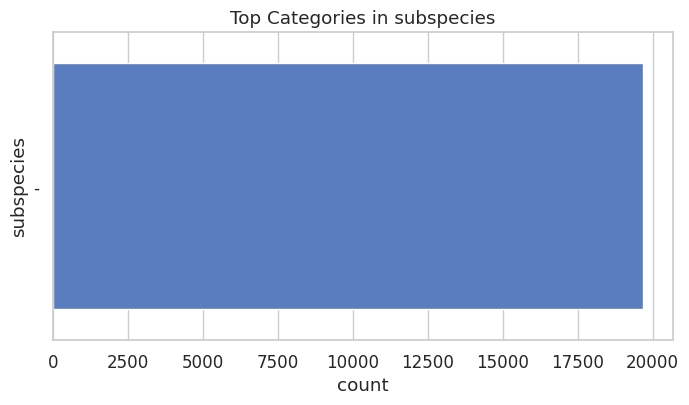

In [27]:
for col in categorical_cols[:5]:  # limit to first 5 for readability
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])  # top 10 categories
    plt.title(f"Top Categories in {col}")
    plt.show()

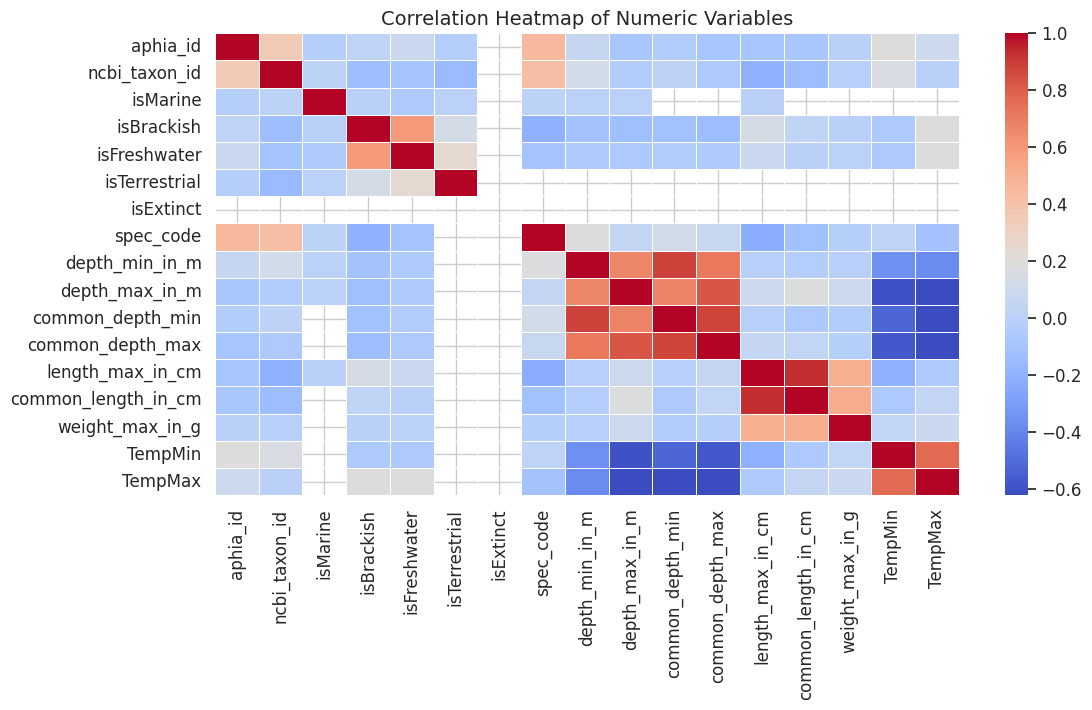

In [28]:
# 📌 Step 7. Correlation heatmap (numeric features only)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.show()

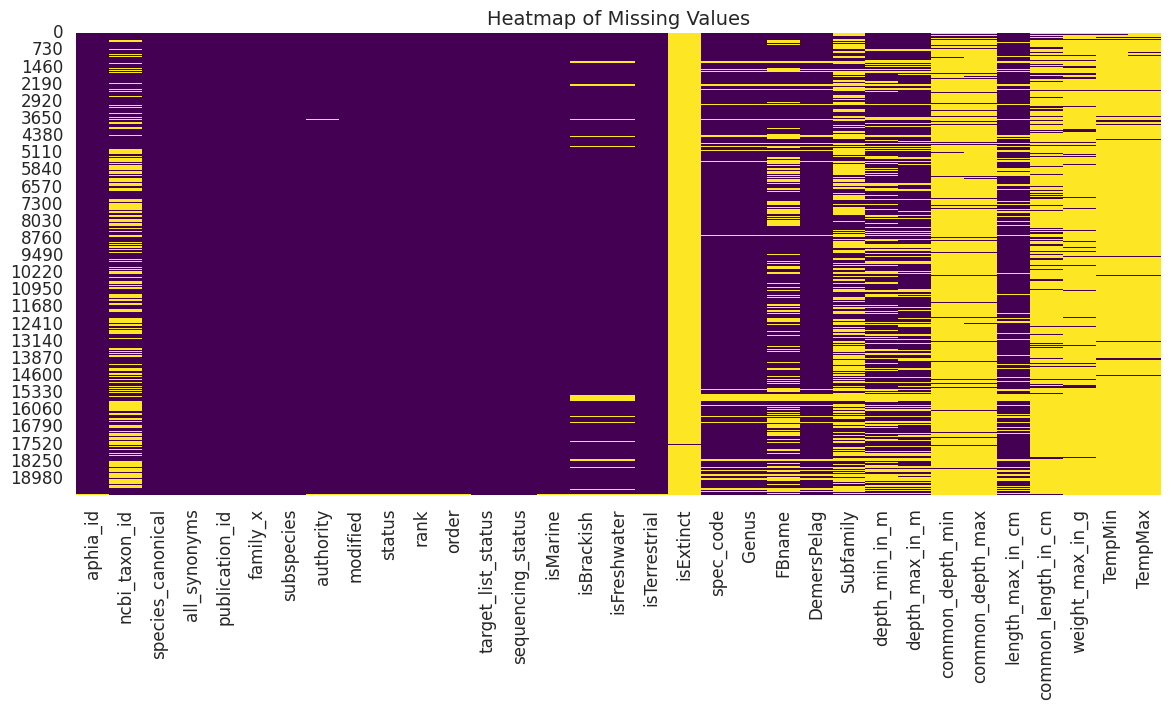

In [29]:
# 📌 Step 8. Missing values visualization
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()

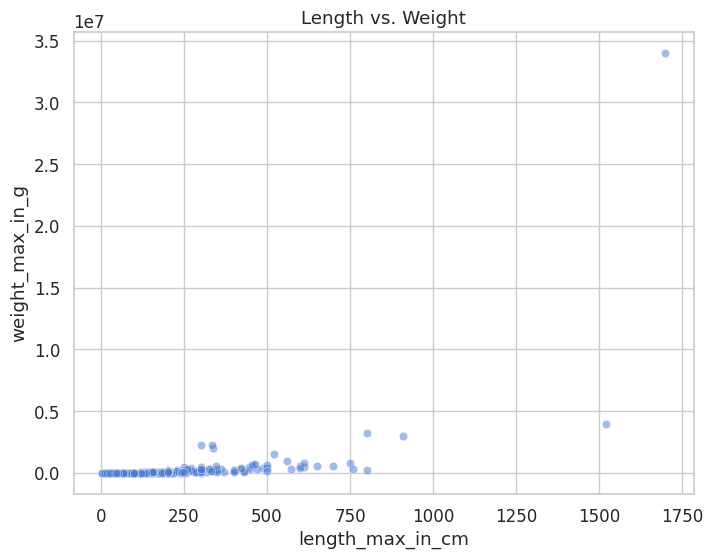

In [30]:
# 📌 Step 9. Example relationships
if "length_max_in_cm" in df.columns and "weight_max_in_g" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="length_max_in_cm", y="weight_max_in_g", alpha=0.5)
    plt.title("Length vs. Weight")
    plt.show()

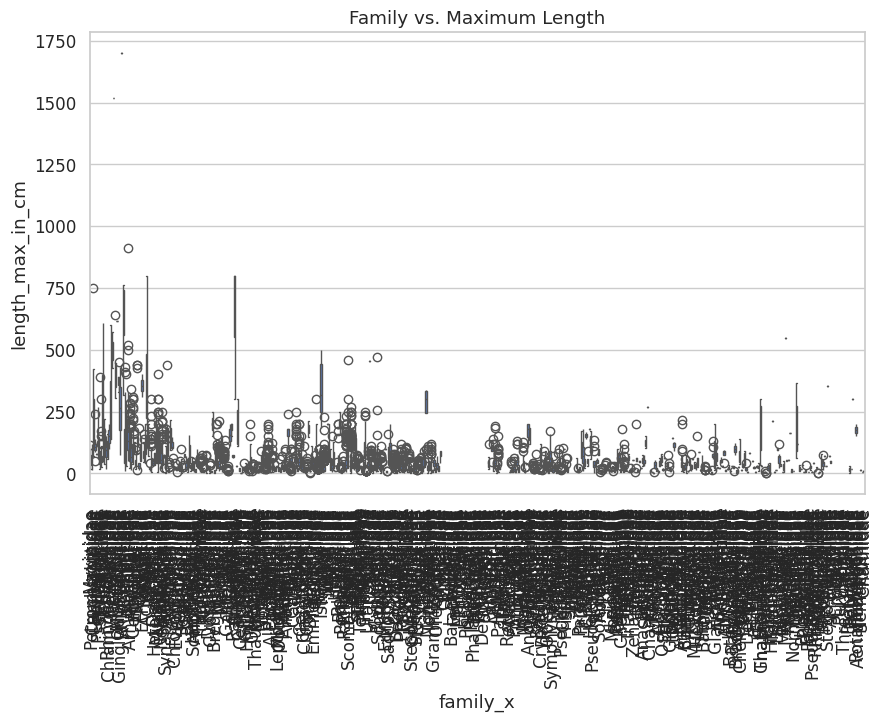

In [31]:
if "family_x" in df.columns and "length_max_in_cm" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="family_x", y="length_max_in_cm")
    plt.xticks(rotation=90)
    plt.title("Family vs. Maximum Length")
    plt.show()